In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [10]:
train = pd.read_csv(r'C:\Users\Arvind\Downloads\bigdatamart_rep-master\bigdatamart_Train.csv')
test = pd.read_csv(r'C:\Users\Arvind\Downloads\bigdatamart_rep-master\bigdatamart_Test.csv')

In [14]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [18]:
### checking size of both dataset Train and test.
print('Size of Training data: ',train.shape,'\nSize of Testing data: ',test.shape)

Size of Training data:  (8523, 12) 
Size of Testing data:  (5681, 11)


##### in our training dataset we have 8523 rows and 12 columns
##### And in Testing dataset we have 5681 rows and 11 columns.

In [21]:
### Checking for null values
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### In training dataset, Column Item weight and Outlet size contain 1463 and 2410 null values respectivly.

In [23]:
# Checking the columns of the train dataset and test dataset
print(train.columns,'\n')
print(test.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object') 

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [24]:
### Checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [26]:
# High level statistics:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## EDA 
#### Univeriate Anaylsis

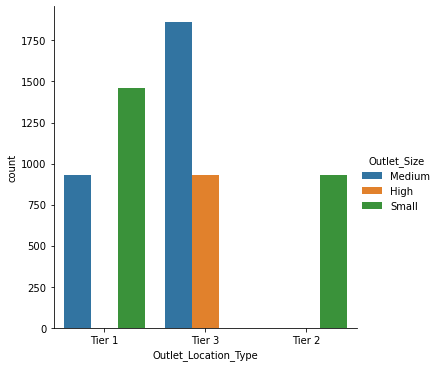

In [27]:
sns.factorplot('Outlet_Location_Type',data = train,hue ='Outlet_Size' ,kind='count')


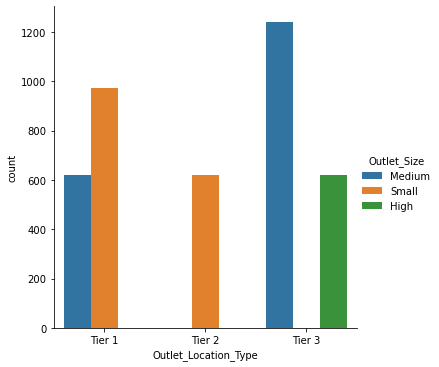

In [28]:
sns.factorplot('Outlet_Location_Type',data = test,hue ='Outlet_Size' ,kind='count')


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

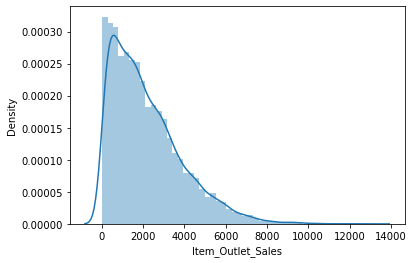

In [29]:
sns.distplot(train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

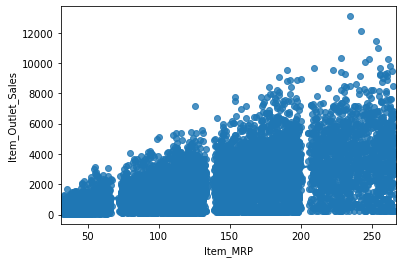

In [32]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=sale_MRP)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

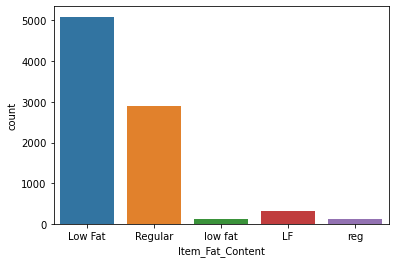

In [33]:
sns.countplot(train['Item_Fat_Content'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

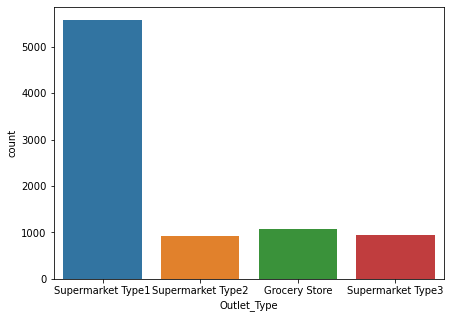

In [37]:
# Visualizing the column 'Outlet_Type'
plt.rcParams['figure.figsize'] = (7,5)
sns.countplot(train['Outlet_Type'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

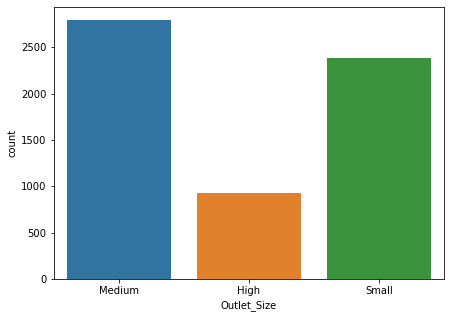

In [38]:
# Visualizing the column 'Outlet_Size'
sns.countplot(train['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

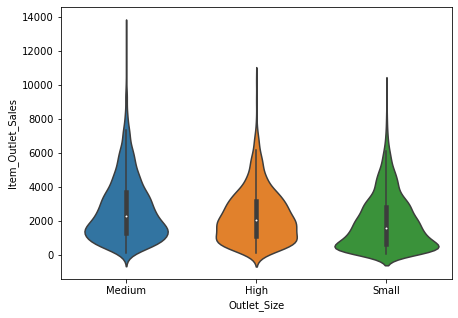

In [39]:
# Visualizing comparision of 'Item_Outlet_Sales' with that of 'Outlet_Size' 
sns.violinplot(x = train['Outlet_Size'], y = train['Item_Outlet_Sales'])

### Biveriate Anaylsis

In [47]:
# filling null values
full_data = [train, test]
for data in full_data:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
    data['Outlet_Size'].fillna('Medium',inplace = True)

<AxesSubplot:>

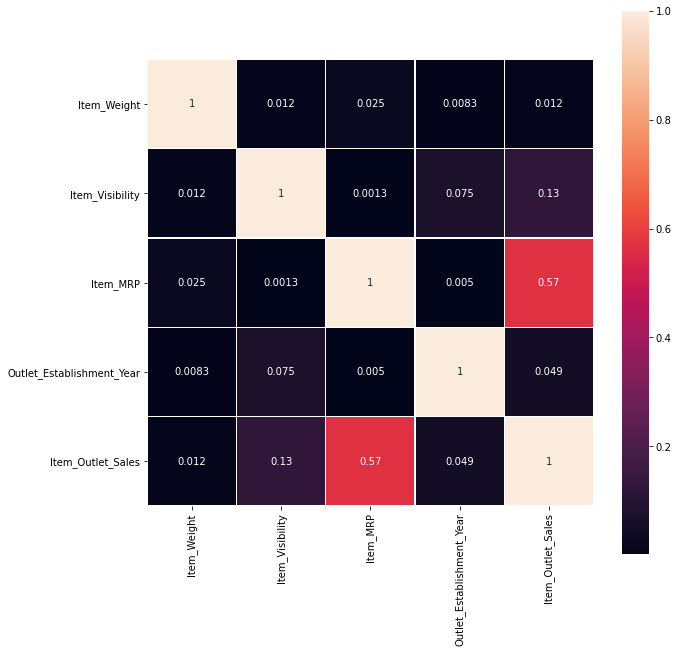

In [50]:
### Le`t's check Correlation between all the variables.
train_corr = train.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(train_corr,linewidths=0.1,square=True,annot=True)

In [74]:
x = enc.fit_transform(train['Item_Identifier'])

In [75]:
train['Item_Identifier'] = x

In [77]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,1297,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Seperating Independant variables and Target variable`

In [79]:
# Spliting data set into x and y.
x = train.drop(['Item_Outlet_Sales'],axis=1)
y = train['Item_Outlet_Sales']

## Scaling (Standardization)

In [81]:
#### Now lets scale our data.
from sklearn.preprocessing import LabelEncoder
scale = LabelEncoder()
x = scale.fit_transform(x)


ValueError: y should be a 1d array, got an array of shape (8523, 11) instead.